In [1]:
#importing the libraries
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#loading the dataset
df=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
#seeing the first 5 row of dataset
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
#checking the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
#checking the null value
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
#checking the duplicate
df.duplicated().sum()

0

In [7]:
# as we have seen that the totalcharges column are in object but we have to change in float
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')

In [8]:
#now after converting we have to see there is null value or not
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [9]:
# as we have found the after converting to this columns we found that we have got the 11 null value we have to remove 
# null value
df.dropna(inplace=True)

In [10]:
#again checking null value
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# Observation

as we have seen there is no duplicate and null value we have to prosude to further step to do EDA


# EDA


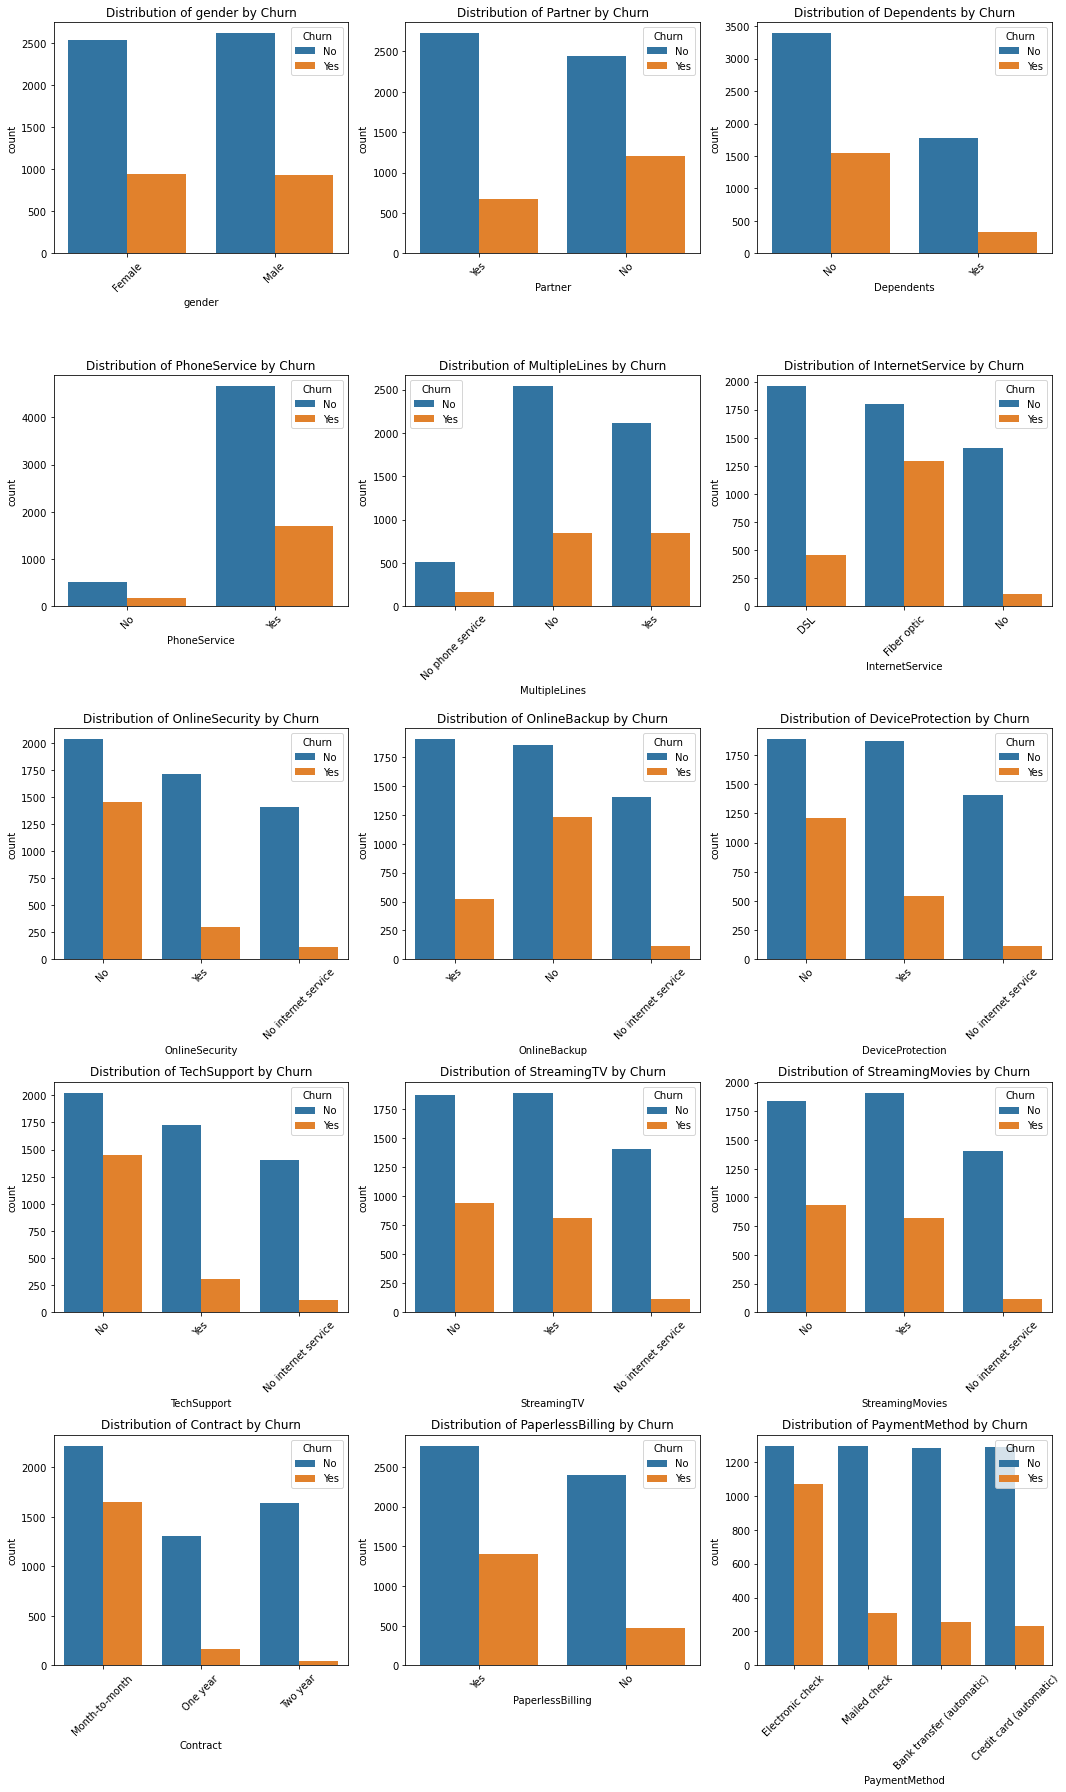

In [11]:
# we have to plot the countplot of various column  with the churn 
categorical_cols=df.select_dtypes(include="object").columns.tolist()
categorical_cols.remove('customerID')
categorical_cols.remove('Churn')

n_cols=3
n_rows=(len(categorical_cols)+n_cols-1)//n_cols

fig,axes= plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
axes=axes.flatten()

for i, col in enumerate(categorical_cols):
    sns.countplot(data=df,x=col,hue="Churn",ax=axes[i])
    axes[i].set_title(f'Distribution of {col} by Churn')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].legend(title='Churn')
plt.tight_layout()
plt.show()

# Observation


we have observe the following from this graph
 1. Male and Female churning equally.
 
 2. Those who having partner churning less then those who not having partner.
 
 3. Same for the people who is having dependth.
 
 4. Those who having phone service are churn less.
 
 5. Out of all internet services Dsl have lowest churn customer then other two.
 
 6. Those who taking month to month contract have highest possibility of churn.

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'SeniorCitizen']


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,SeniorCitizen,Churn_numeric
SeniorCitizen,1.000000,0.015683,0.219874,0.102411,1.000000,0.150541
tenure,0.015683,1.000000,0.246862,0.825880,0.015683,-0.354049
MonthlyCharges,0.219874,0.246862,1.000000,0.651065,0.219874,0.192858
TotalCharges,0.102411,0.825880,0.651065,1.000000,0.102411,-0.199484
SeniorCitizen,1.000000,0.015683,0.219874,0.102411,1.000000,0.150541
Churn_numeric,0.150541,-0.354049,0.192858,-0.199484,0.150541,1.000000


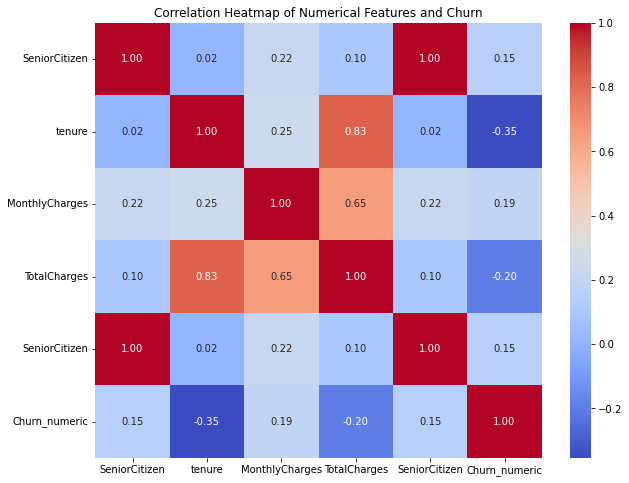

In [12]:
#now we make a heatmap to all the numerical variable and making a new column to covert churn into churn numeric
numerical_cols = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges','SeniorCitizen']
print(numerical_cols)

# Convert 'Churn' column to numerical (0 for 'No', 1 for 'Yes')
df['Churn_numeric'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# Select only numerical columns and the new 'Churn_numeric' column
numerical_data = df[numerical_cols + ['Churn_numeric']]

# Calculate the correlation matrix
correlation_matrix = numerical_data.corr()

# Display the correlation matrix
display(correlation_matrix)

# Generate a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features and Churn')
plt.show()

# Observation


1. as we have seen that Seniorcitizen and monthlycharges are poistively related to churing

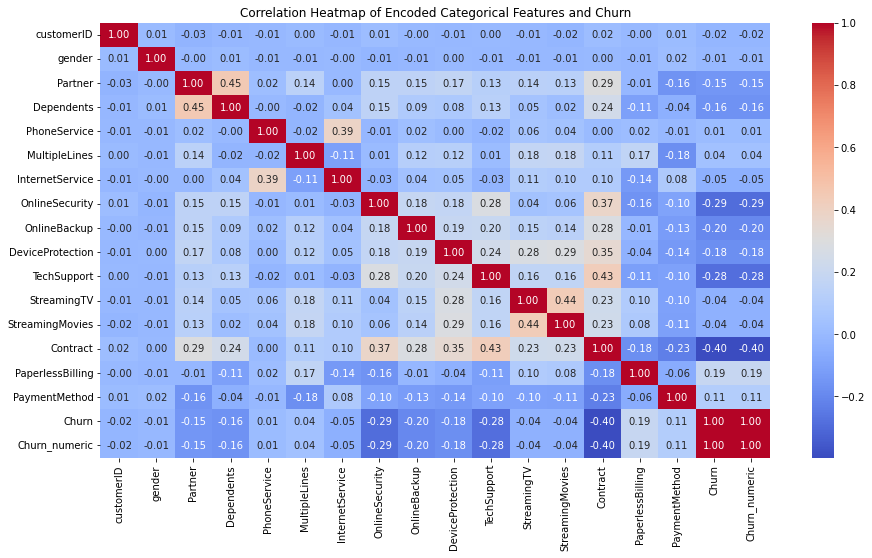

In [13]:
#now we make heatmap for all the categorical variable
categorical_cols=df.select_dtypes(include="object").columns.tolist()
from sklearn.preprocessing import LabelEncoder
cat_data = df[categorical_cols + ['Churn_numeric']].copy()

# Encode categorical variables
encoder = LabelEncoder()
for col in categorical_cols:
    cat_data[col] = encoder.fit_transform(cat_data[col])

# Compute correlation and plot
corr_matrix = cat_data.corr()
plt.figure(figsize=(15, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Encoded Categorical Features and Churn")
plt.show()

# Observation

1. As we have seen that paperlessbilling,paymentmethod,phoneservice and multiple line are poistively related to churn.

2. As we have seen partner and dependense are highly poistive related to each other.

3. Techsupport and contract are poistive related to each other.

4. streaming tv and streaming movie are poistively related to each other.

5. contract are higly pistive related onlinesecurity,onlinebackup and deviceprotection.

# Data Processing

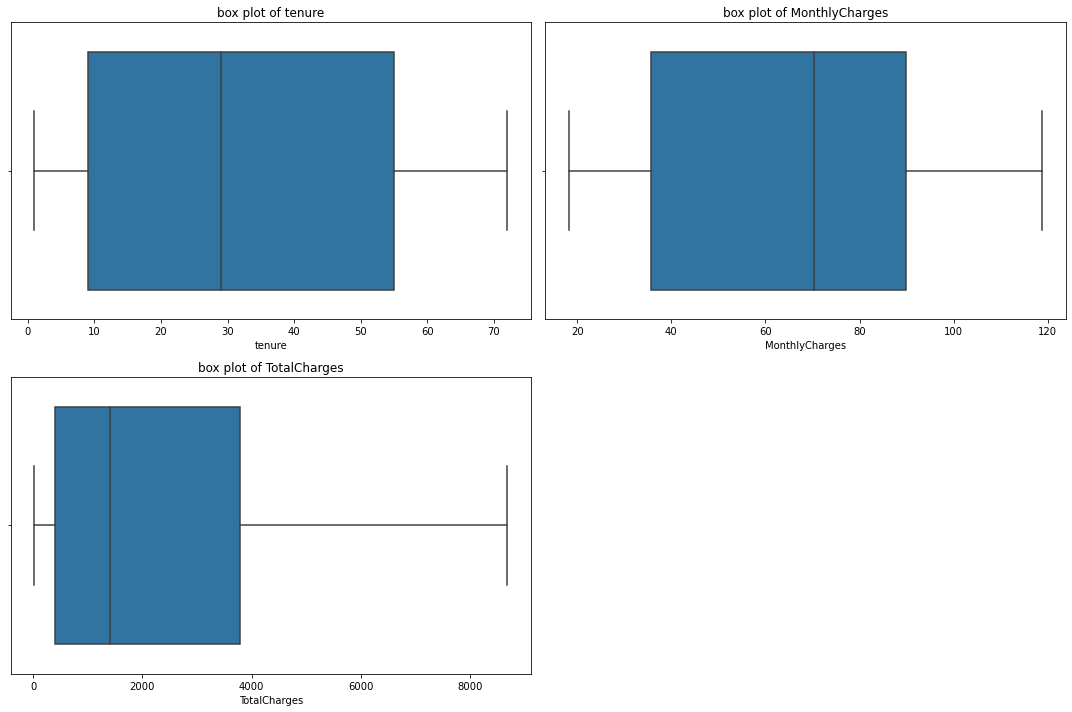

In [14]:
# we have to check all outlier for our numerical variable
plt.figure(figsize=(15,10))
for i,col in enumerate(['tenure','MonthlyCharges','TotalCharges']):
    plt.subplot(2,2,i+1)
    sns.boxplot(x=df[col])
    plt.title(f'box plot of {col}')
plt.tight_layout()
plt.show()

# Observation

As we have seen there is no outlier in our numerical we are procceding for the next step.

# MODELING

In [15]:
# we are copying our data so that our orginal data is not effected
df_copy1=df.copy()

In [16]:
df_copy1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn_numeric
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1


In [17]:
# we using label encoder for all the categorical column
from sklearn.preprocessing import LabelEncoder
categorical_cols=df_copy1.select_dtypes(include="object").columns.tolist()
label_encoder=LabelEncoder()
for col in categorical_cols:
    df_copy1[col]=label_encoder.fit_transform(df_copy1[col])
df_copy1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn_numeric
0,5365,0,0,1,0,1,0,1,0,0,...,0,0,0,0,1,2,29.85,29.85,0,0
1,3953,1,0,0,0,34,1,0,0,2,...,0,0,0,1,0,3,56.95,1889.50,0,0
2,2558,1,0,0,0,2,1,0,0,2,...,0,0,0,0,1,3,53.85,108.15,1,1
3,5524,1,0,0,0,45,0,1,0,2,...,2,0,0,1,0,0,42.30,1840.75,0,0
4,6500,0,0,0,0,2,1,0,1,0,...,0,0,0,0,1,2,70.70,151.65,1,1


In [18]:
#checking the data type
df_copy1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   int32  
 1   gender            7032 non-null   int32  
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   int32  
 4   Dependents        7032 non-null   int32  
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   int32  
 7   MultipleLines     7032 non-null   int32  
 8   InternetService   7032 non-null   int32  
 9   OnlineSecurity    7032 non-null   int32  
 10  OnlineBackup      7032 non-null   int32  
 11  DeviceProtection  7032 non-null   int32  
 12  TechSupport       7032 non-null   int32  
 13  StreamingTV       7032 non-null   int32  
 14  StreamingMovies   7032 non-null   int32  
 15  Contract          7032 non-null   int32  
 16  PaperlessBilling  7032 non-null   int32  


In [19]:
# it look fine every column is in numerical column that is basic requirement of ml model
# now we have to split the data for training and testing
X=df_copy1.drop(['customerID', 'Churn', 'Churn_numeric'], axis=1)
y=df_copy1['Churn_numeric']

In [20]:
#checking the shape of X and y
print(X.shape)
print(y.shape)

(7032, 19)
(7032,)


In [21]:
#we have to scale the numerical column for that we have used standardscaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
scaler=StandardScaler()
num_col=['tenure', 'MonthlyCharges', 'TotalCharges']
X[num_col]=scaler.fit_transform(X[num_col])

In [22]:
# Now we have split data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state = 40, stratify=y)

In [23]:
#checking the shape
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (4922, 19)
X_test shape: (2110, 19)
y_train shape: (4922,)
y_test shape: (2110,)


In [24]:
X_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
983,1,0,0,0,-1.280248,1,2,1,0,0,0,0,0,2,0,1,2,0.724701,-0.969157
6565,1,0,1,0,1.164390,1,2,1,2,2,0,0,2,2,0,1,2,1.376214,1.805295
2212,1,0,0,0,-0.913552,1,0,2,1,1,1,1,1,1,1,0,3,-1.505733,-0.907721
2526,1,0,0,0,-1.280248,1,0,2,1,1,1,1,1,1,0,0,3,-1.509057,-0.998804
2751,0,0,1,1,-0.546857,0,1,0,0,0,0,0,0,0,0,1,3,-1.327896,-0.815535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
768,1,0,0,0,0.349510,1,0,1,0,0,0,2,0,0,0,1,2,0.314182,0.355509
6532,0,1,0,0,-0.587601,1,0,2,1,1,1,1,1,1,1,0,0,-1.477478,-0.844301
3528,1,0,0,0,-0.669089,1,0,2,1,1,1,1,1,1,0,1,3,-1.499084,-0.856301
943,0,0,1,0,1.612573,0,1,0,2,2,2,2,2,2,2,0,0,0.023328,1.163146


In [25]:
X_test

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
5710,0,0,1,0,1.531085,1,2,1,0,2,2,2,2,2,2,1,2,1.519148,2.412744
2513,1,0,1,1,0.797694,1,0,2,1,1,1,1,1,1,2,0,3,-1.515705,-0.542021
1078,0,1,0,0,1.082902,1,2,1,0,2,0,0,0,0,2,1,1,0.478722,1.017841
5711,0,1,1,0,-0.506113,1,2,1,0,0,2,0,2,0,0,0,2,0.864311,-0.146607
6574,0,1,0,0,-0.954296,1,2,1,0,0,2,0,2,0,0,1,2,0.841043,-0.647002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2115,0,0,0,0,1.571829,1,2,1,2,2,2,2,2,2,2,1,2,1.790057,2.732847
1290,1,1,1,0,1.612573,1,2,0,2,2,2,0,2,2,2,0,1,0.653234,1.595576
2095,1,0,0,0,-1.280248,1,0,1,0,0,0,0,2,0,0,1,2,0.503652,-0.972091
2139,0,0,0,0,-1.035784,1,0,0,0,0,0,0,2,2,0,1,2,0.068202,-0.805256


In [26]:
#loading the machine learning library
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import (
    RandomForestClassifier, GradientBoostingClassifier,
    AdaBoostClassifier, ExtraTreesClassifier
)
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import time

In [27]:
#creating pipeline for our models
def extended_grid_search(X_train, y_train, X_test, y_test):
    models_params = {
        'LogisticRegression': {
            'model': Pipeline([
                
                ('clf', LogisticRegression(max_iter=1000))
            ]),
            'params': {'clf__C': [0.01, 0.1, 1, 10],
                       'clf__solver': ['lbfgs', 'liblinear']}
        },
        
        'SVM': {
            'model': Pipeline([
                ('scaler', StandardScaler()),
                ('clf', SVC())
            ]),
            'params': {'clf__C': [0.1, 1, 10],
                       'clf__kernel': ['linear', 'rbf'],
                       'clf__gamma': ['scale', 'auto']}
        },
        
        'KNeighbors': {
            'model': Pipeline([
                
                ('clf', KNeighborsClassifier())
            ]),
            'params': {'clf__n_neighbors': [3, 5, 7],
                       'clf__weights': ['uniform', 'distance']}
        },
        
        'DecisionTree': {
            'model': DecisionTreeClassifier(),
            'params': {'max_depth': [None, 5, 10],
                       'min_samples_split': [2, 5, 10]}
        },
        
        'RandomForest': {
            'model': RandomForestClassifier(),
            'params': {'n_estimators': [100, 200],
                       'max_depth': [None, 5, 10]}
        },
        
        'ExtraTrees': {
            'model': ExtraTreesClassifier(),
            'params': {'n_estimators': [100, 200],
                       'max_depth': [None, 5, 10]}
        },
        
        'GradientBoosting': {
            'model': GradientBoostingClassifier(),
            'params': {'n_estimators': [100, 200],
                       'learning_rate': [0.05, 0.1],
                       'max_depth': [3, 5]}
        },
        
        'AdaBoost': {
            'model': AdaBoostClassifier(),
            'params': {'n_estimators': [50, 100, 200],
                       'learning_rate': [0.05, 0.1, 1.0]}
        },
        
        'NaiveBayes': {
            'model': GaussianNB(),
            'params': {}
        }
        
    }
        
    results = []
    best_models = {}
    total_models = len(models_params)

    for i, (name, mp) in enumerate(models_params.items(), 1):
        print(f"[{i}/{total_models}] Training {name}...")
        start = time.time()

        gs = GridSearchCV(mp['model'], mp['params'], cv=5, n_jobs=-1)
        gs.fit(X_train, y_train)
        y_pred = gs.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        duration = time.time() - start
        print(f"[{i}/{total_models}] {name} finished in {duration:.2f}s — Accuracy: {acc:.4f}")

        results.append({
            'Model': name,
            'Accuracy': acc,
            'Best Params': gs.best_params_,
            'Train Time (s)': round(duration, 2)
        })
        
        best_models[name] = {
            'best_model': gs.best_estimator_,
            'test_accuracy': acc,
            'y_pred': y_pred
        }
        
    results_df = pd.DataFrame(results).sort_values(by="Accuracy", ascending=False).reset_index(drop=True)

    best_name = results_df.iloc[0]['Model']
    best_info = best_models[best_name]

    print(f"\nBest Model: {best_name}")
    print(f"Accuracy: {best_info['test_accuracy']:.4f}")
    print(f"Best Params: {results_df.iloc[0]['Best Params']}")

    return best_name, best_info['best_model'], best_info['test_accuracy'], best_info['y_pred']

In [28]:
#finding the accuracy of model and finding the best model according to their accuracy
best_name, best_model, best_acc ,best_y_pred= extended_grid_search(X_train, y_train, X_test, y_test)

print(f"Best Model: {best_name}")
print(f"Accuracy: {best_acc:.4f}")

[1/9] Training LogisticRegression...
[1/9] LogisticRegression finished in 7.36s — Accuracy: 0.8114
[2/9] Training SVM...
[2/9] SVM finished in 17.34s — Accuracy: 0.7991
[3/9] Training KNeighbors...
[3/9] KNeighbors finished in 6.46s — Accuracy: 0.7768
[4/9] Training DecisionTree...
[4/9] DecisionTree finished in 0.37s — Accuracy: 0.7844
[5/9] Training RandomForest...
[5/9] RandomForest finished in 6.73s — Accuracy: 0.8085
[6/9] Training ExtraTrees...
[6/9] ExtraTrees finished in 5.48s — Accuracy: 0.8081
[7/9] Training GradientBoosting...
[7/9] GradientBoosting finished in 14.65s — Accuracy: 0.8109
[8/9] Training AdaBoost...
[8/9] AdaBoost finished in 7.86s — Accuracy: 0.8104
[9/9] Training NaiveBayes...
[9/9] NaiveBayes finished in 0.04s — Accuracy: 0.7640

Best Model: LogisticRegression
Accuracy: 0.8114
Best Params: {'clf__C': 0.1, 'clf__solver': 'liblinear'}
Best Model: LogisticRegression
Accuracy: 0.8114


In [29]:
from sklearn.metrics import confusion_matrix, f1_score, classification_report

F1 Score for LogisticRegression: 0.6202

Confusion Matrix:
[[1387  162]
 [ 236  325]]


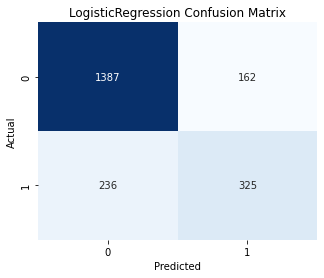


Classification Report:

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1549
           1       0.67      0.58      0.62       561

    accuracy                           0.81      2110
   macro avg       0.76      0.74      0.75      2110
weighted avg       0.80      0.81      0.81      2110



In [30]:
f1 = f1_score(y_test, best_y_pred)
print(f"F1 Score for {best_name}: {f1:.4f}\n")


cm = confusion_matrix(y_test, best_y_pred)
print("Confusion Matrix:")
print(cm)

# رسم Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"{best_name} Confusion Matrix")
plt.show()


print("\nClassification Report:\n")
print(classification_report(y_test, best_y_pred))

# Observation

We have use many model for this dataset but best accuracy we have find in logistic regression. So we use logistic regression model for the further predication.

# Feature that Contributed Most to our Model


In [31]:
log_reg = best_model.named_steps['clf']

In [32]:
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': np.abs(log_reg.coef_[0])   # absolute coefficients
}).sort_values(by='Importance', ascending=False)

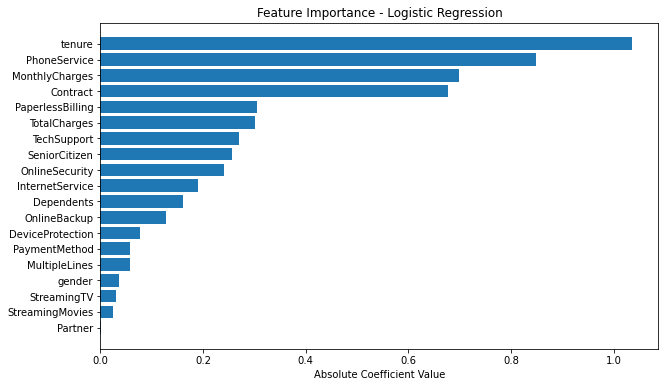

In [33]:
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.gca().invert_yaxis()
plt.xlabel("Absolute Coefficient Value")
plt.title("Feature Importance - Logistic Regression")
plt.show()

# Observation

Tenure and Phone service feature contributed to most our model

# CONCLUSION

We have choosen the logistic regression model beacuse there accuracy slightly better than other and after plotting the 
the feature importance graph we find that Tenure and phone service play a crucial role in our model.